In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [299]:
datei_test = "C:\\Users\\KaiTs\\Documents\\Data Science\\Datasets\\titanic\\test.csv"
datei_train = "C:\\Users\\KaiTs\\Documents\\Data Science\\Datasets\\titanic\\train.csv"
datei_gender = "C:\\Users\\KaiTs\\Documents\\Data Science\\Datasets\\titanic\\gender_submission.csv"

test_raw = pd.read_csv(datei_test)
train_raw = pd.read_csv(datei_train)
df_gender = pd.read_csv(datei_gender)

In [300]:
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [301]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Dateien zusammenführen

In [302]:
# Führe die Test-Daten mit den Überlebensinformationen zusammen
df_raw = pd.merge(test_raw, df_gender, on="PassengerId", how="left")

#Test und Trainingsdaten mergen
df = pd.concat([train_raw, df_raw], ignore_index=True)






In [303]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [306]:

df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.48,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.28
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


In [307]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In Age fehlt eine signifikante Menge. Diese wird mit Medianwerten aufgefüllt

<Axes: xlabel='Pclass', ylabel='Age'>

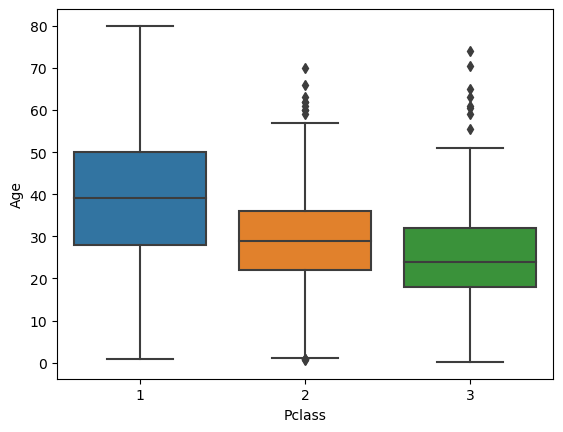

In [308]:
sns.boxplot(data=df, x = 'Pclass', y = 'Age')

In [309]:
#Einsetzen der Medianwerte in Age
def preprocessing(df):
    median_class_1 = df[df['Pclass']==1]['Age'].median()
    median_class_2 = df[df['Pclass']==2]['Age'].median()
    median_class_3 = df[df['Pclass']==3]['Age'].median()

    def transferage(para):
        Alter = para[0]
        Buchungsklasse = para[1]

        if pd.isnull(Alter):
            if Buchungsklasse == 1:
                return median_class_1
            elif Buchungsklasse == 2:
                return median_class_2
            else:
                return median_class_3
        else:
            return Alter

    df['Age'] = df[['Age', 'Pclass']].apply(transferage, axis = 1)

In [310]:
preprocessing(df)

In [311]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

C:\Users\KaiTs\AppData\Local\Temp\ipykernel_16544\3204948918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

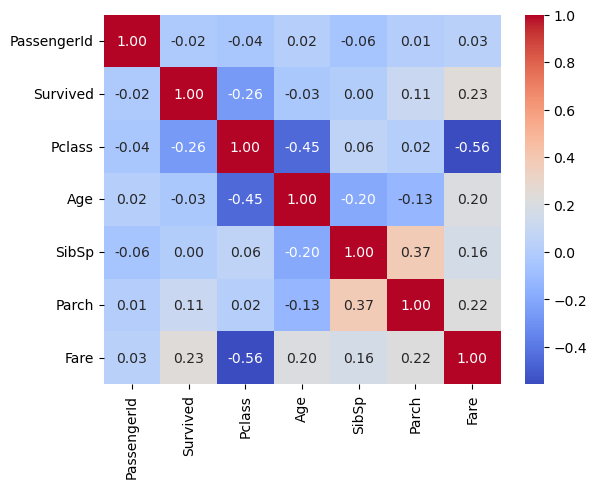

In [312]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

embarked integrieren

In [313]:
from sklearn.preprocessing import LabelEncoder


# Kopie des DataFrame erstellen, um Änderungen vorzunehmen
df_encoded = df.copy()

# Label-Encoding für jede kategorische Spalte durchführen
categorical_columns = ['Embarked', 'Sex']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df[column])
  

# Zuordnung von String zu numerischem Wert für jede kategorische Spalte ausgeben
for column in categorical_columns:
    print("Zuordnung von String zu numerischem Wert für die Spalte '{}':".format(column))
    for string_value, numeric_value in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)):
        print("{}: {}".format(string_value, numeric_value))
    print()

Zuordnung von String zu numerischem Wert für die Spalte 'Embarked':
C: 0
Q: 1
S: 2
nan: 3

Zuordnung von String zu numerischem Wert für die Spalte 'Sex':
female: 0
male: 1



C:\Users\KaiTs\AppData\Local\Temp\ipykernel_16544\467532605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


<Axes: >

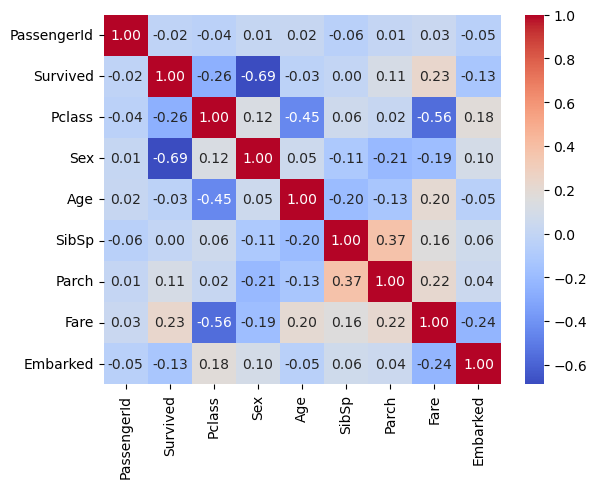

In [314]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

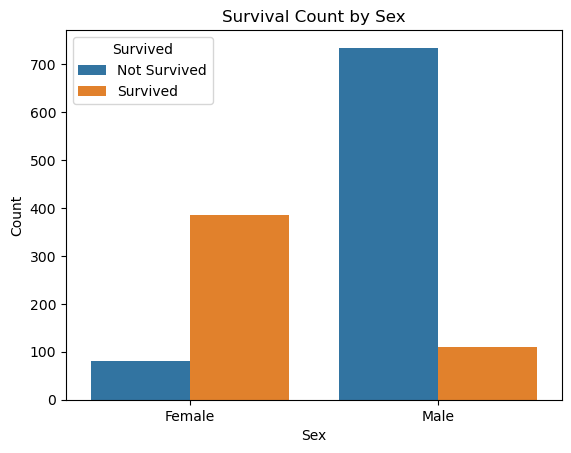

In [315]:
sns.countplot(data=df_encoded, x='Sex', hue='Survived')
labels_sex = {0: 'Female', 1: 'Male'}
labels_survived = {0: 'Not Survived', 1: 'Survived'}
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=[labels_sex[0], labels_sex[1]])
plt.legend(title='Survived', labels=[labels_survived[0], labels_survived[1]])

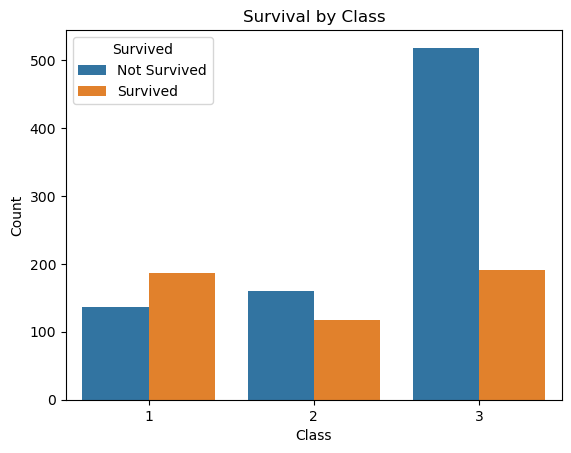

In [316]:
sns.countplot(data=df_encoded, x='Pclass', hue='Survived')
labels_class = {1: '1st class', 2: '2nd Class', 3: '3rd Class'}
labels_survived = {0: 'Not Survived', 1: 'Survived'}
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=[labels_survived[0], labels_survived[1]])

<Axes: xlabel='Parch', ylabel='count'>

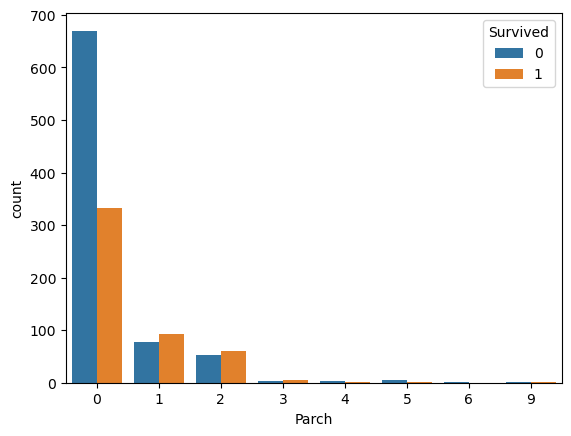

In [317]:
sns.countplot(data=df_encoded, x='Parch', hue='Survived')

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix


In [319]:
from sklearn.linear_model import LogisticRegression
X = df_encoded[['Sex', 'Pclass', 'Age', 'Parch']]
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)


Auswertung

<Axes: >

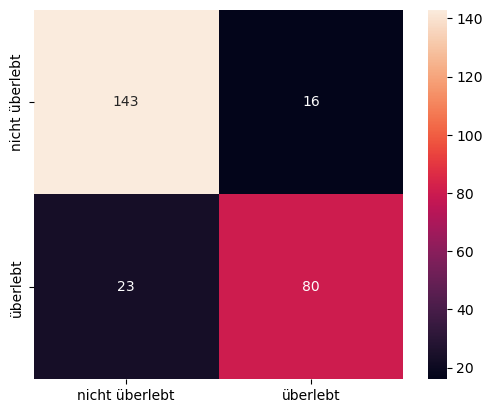

In [320]:
matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(matrix, square=True, annot=True, fmt="d", xticklabels=("nicht überlebt", "überlebt"), yticklabels=("nicht überlebt", "überlebt"))

Alternatives Modell

Accuracy of Random Forest Classifier: 0.8244274809160306


<Axes: >

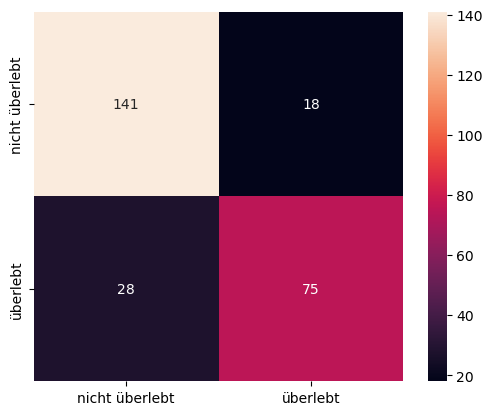

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred_rf = rf_classifier.predict(X_test)

# Berechne die Genauigkeit des Modells
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)


matrix_rf = confusion_matrix(y_test, y_pred_rf)


sns.heatmap(matrix_rf, square=True, annot=True, fmt="d", xticklabels=("nicht überlebt", "überlebt"), yticklabels=("nicht überlebt", "überlebt"))
